In [1]:
!pwd

/Users/oscarfridh/Desktop/backtick/exjobb/notebooks


In [2]:
from os import chdir

In [3]:
chdir('..')

In [4]:
!pwd

/Users/oscarfridh/Desktop/backtick/exjobb


In [5]:
!ls

__pycache__          github_fetch.py      repos.txt
cowait               lda_model.py         requirements.txt
cowait_issues.pickle model.py             signatures
data                 notebooks            temp.py
evaluate.py          panda_issues2.json   test.json
extract.py           pandas_csv.py        utils.py
fetch_doc_changes.py release_tags.py      visit.py
filter_sources.py    release_tags_test.py
gather.py            repos


In [6]:
from extract import Extractor
from os import getcwd
import subprocess
import re

In [7]:
url = 'https://github.com/backtick-se/cowait.git'
quiet_flag = '&> /dev/null'

name = re.search('.*\/(.*).git', url).group(1)
cwd = f'{getcwd()}/{name}' 	# Repo directory
dwd = f'{cwd}/docs' 		# Docs directory

In [8]:
subprocess.run(f'git clone {url} {cwd} {quiet_flag}', shell=True)
clean = lambda: subprocess.run(f'rm -rf {cwd}', shell=True)

In [9]:
paths, contents = Extractor('md').extract(dwd)

In [10]:
from lda_model import *

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/oscarfridh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/oscarfridh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
lda_model, dictionary, corpus = train_lda_model(contents, 10, tfidf=False)

Topic: 0 
Words: 0.076*"sleep" + 0.049*"asyncio" + 0.043*"parallel" + 0.035*"durat" + 0.032*"contribut" + 0.031*"import" + 0.030*"link" + 0.030*"welcom" + 0.030*"exist" + 0.030*"document"
Topic: 1 
Words: 0.135*"dockerfil" + 0.062*"custom" + 0.055*"imag" + 0.054*"default" + 0.043*"instal" + 0.035*"extend" + 0.034*"docker" + 0.026*"https" + 0.025*"backtick" + 0.025*"master"
Topic: 2 
Words: 0.043*"docker" + 0.041*"python" + 0.036*"doc" + 0.036*"https" + 0.034*"instal" + 0.032*"shell" + 0.030*"librari" + 0.029*"sleep" + 0.024*"start" + 0.023*"base"
Topic: 3 
Words: 0.086*"shell" + 0.059*"contain" + 0.053*"command" + 0.047*"imag" + 0.039*"parallel" + 0.031*"input" + 0.029*"dict" + 0.028*"async" + 0.025*"docker" + 0.024*"exampl"
Topic: 4 
Words: 0.123*"hello" + 0.055*"input" + 0.046*"python" + 0.037*"import" + 0.033*"world" + 0.029*"function" + 0.028*"class" + 0.026*"docker" + 0.026*"instal" + 0.025*"return"
Topic: 5 
Words: 0.091*"push" + 0.089*"imag" + 0.080*"kubernet" + 0.077*"build" + 

In [15]:
for index, score in sorted(lda_model[corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8714272975921631	 
Topic: 0.076*"sleep" + 0.049*"asyncio" + 0.043*"parallel" + 0.035*"durat" + 0.032*"contribut" + 0.031*"import" + 0.030*"link" + 0.030*"welcom" + 0.030*"exist" + 0.030*"document"

Score: 0.014286266639828682	 
Topic: 0.043*"docker" + 0.041*"python" + 0.036*"doc" + 0.036*"https" + 0.034*"instal" + 0.032*"shell" + 0.030*"librari" + 0.029*"sleep" + 0.024*"start" + 0.023*"base"

Score: 0.014285936020314693	 
Topic: 0.091*"push" + 0.089*"imag" + 0.080*"kubernet" + 0.077*"build" + 0.044*"docker" + 0.041*"registri" + 0.032*"provid" + 0.031*"shell" + 0.029*"configur" + 0.028*"cluster"

Score: 0.01428583636879921	 
Topic: 0.135*"dockerfil" + 0.062*"custom" + 0.055*"imag" + 0.054*"default" + 0.043*"instal" + 0.035*"extend" + 0.034*"docker" + 0.026*"https" + 0.025*"backtick" + 0.025*"master"

Score: 0.014285826124250889	 
Topic: 0.092*"type" + 0.049*"valu" + 0.048*"python" + 0.048*"return" + 0.046*"input" + 0.038*"function" + 0.030*"dict" + 0.027*"import" + 0.026*"hell

In [16]:
import pickle

In [17]:
with open('data/pr/cowait_closed.pickle', 'rb') as f:
    data = pickle.load(f)

pr_titles = [pr['title'] for pr in data]
for i, text in enumerate(pr_titles[:15]):
    print(i, text)

0 add node selector field to task definition
1 Update server.py
2 Fix build on M1 processors
3 Bump url-parse from 1.5.7 to 1.5.10 in /cloud
4 add simple test for kubernetes provider
5 Bump url-parse from 1.5.1 to 1.5.7 in /cloud
6 Bump follow-redirects from 1.13.0 to 1.14.8 in /cloud
7 Bump follow-redirects from 1.13.0 to 1.14.7 in /cloud
8 Bump tensorflow-cpu from 2.4.0 to 2.5.2 in /examples/10-imdb
9 Version 0.4.30
10 Bump url-parse from 1.5.1 to 1.5.3 in /cloud
11 Bump tmpl from 1.0.4 to 1.0.5 in /cloud
12 Bump tensorflow-cpu from 2.4.0 to 2.5.1 in /examples/10-imdb
13 Bump tensorflow-cpu from 2.4.0 to 2.5.1 in /examples/06-tensorflow
14 Bump path-parse from 1.0.6 to 1.0.7 in /cloud


In [21]:
unseen_document = pr_titles[2]
print(unseen_document, "\n")

bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\nTopic: {}".format(score, lda_model.print_topic(index, 5)))

Fix build on M1 processors 


Score: 0.5499554872512817
Topic: 0.087*"instal" + 0.073*"build" + 0.071*"requir" + 0.046*"python" + 0.045*"https"

Score: 0.05002571642398834
Topic: 0.091*"push" + 0.089*"imag" + 0.080*"kubernet" + 0.077*"build" + 0.044*"docker"

Score: 0.050006307661533356
Topic: 0.135*"dockerfil" + 0.062*"custom" + 0.055*"imag" + 0.054*"default" + 0.043*"instal"

Score: 0.05000365898013115
Topic: 0.123*"hello" + 0.055*"input" + 0.046*"python" + 0.037*"import" + 0.033*"world"

Score: 0.05000276118516922
Topic: 0.092*"type" + 0.049*"valu" + 0.048*"python" + 0.048*"return" + 0.046*"input"

Score: 0.05000212416052818
Topic: 0.152*"cluster" + 0.039*"return" + 0.033*"method" + 0.031*"run" + 0.027*"import"

Score: 0.05000155791640282
Topic: 0.086*"shell" + 0.059*"contain" + 0.053*"command" + 0.047*"imag" + 0.039*"parallel"

Score: 0.050001103430986404
Topic: 0.076*"sleep" + 0.049*"asyncio" + 0.043*"parallel" + 0.035*"durat" + 0.032*"contribut"

Score: 0.05000109598040581
Topic:

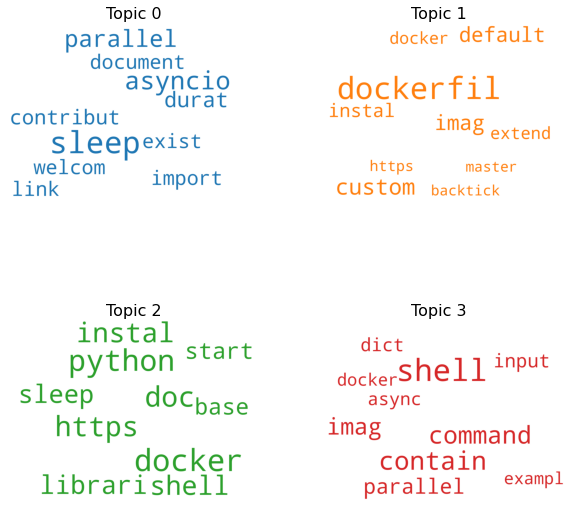

In [30]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from gensim.parsing.preprocessing import STOPWORDS as stop_words

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

In [36]:
data_ready = [*map(preprocess, contents)]

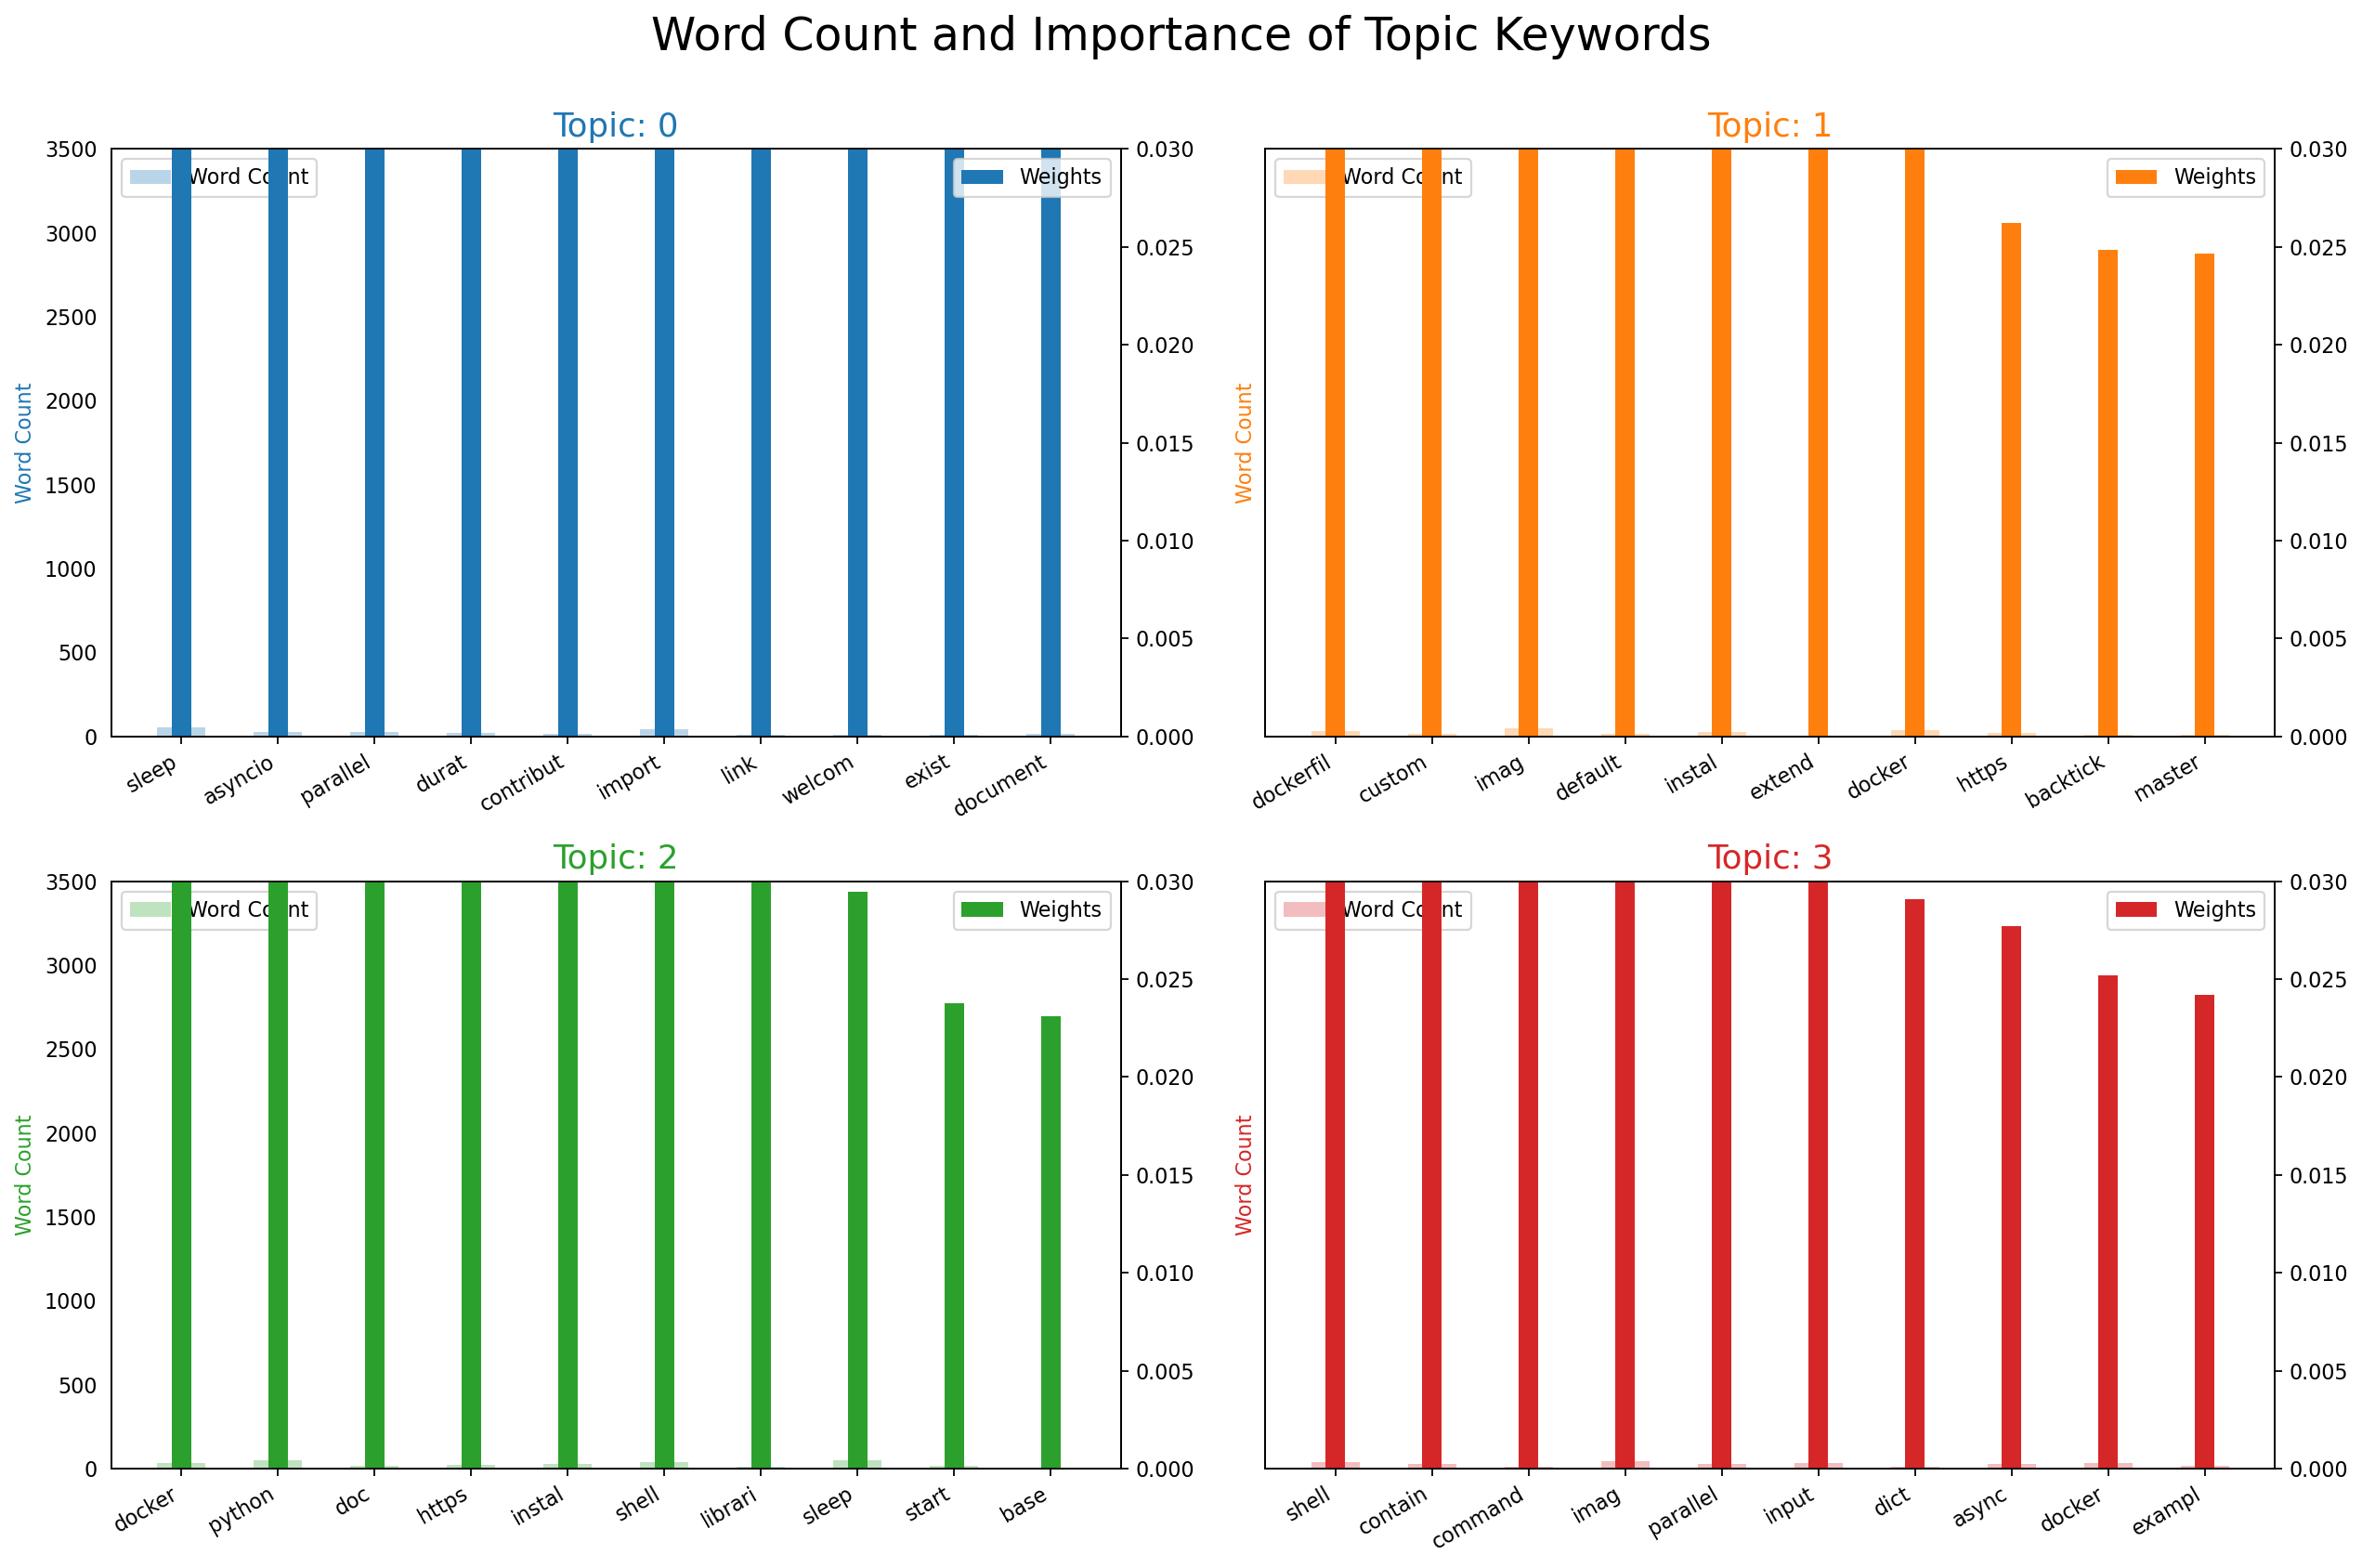

In [38]:
from collections import Counter
import pandas as pd

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [44]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

In [48]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.069946  0.133588       1        1  20.080194
9      0.191379  0.021048       2        1  16.266059
5     -0.136524 -0.114778       3        1  12.041184
1     -0.185849  0.091570       4        1   9.617050
4      0.047275 -0.012849       5        1   9.472054
7      0.062851 -0.167265       6        1   9.355811
6      0.102591 -0.017456       7        1   9.322671
8     -0.186441 -0.006502       8        1   6.677625
3      0.075325  0.022618       9        1   5.469329
2     -0.040554  0.050027      10        1   1.698023, topic_info=          Term       Freq      Total Category  logprob  loglift
115    cluster  36.000000  36.000000  Default  30.0000  30.0000
20   dockerfil  27.000000  27.000000  Default  29.0000  29.0000
125       push  21.000000  21.000000  Default  28.0000  28.0000
28      instal  26.000000  26.000000  Default  27.0000  27.0000
25       hello  37.000000  37.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
92     asyncio   0.387166  25.072791  Topic10  -4.3451  -0.0950
27        imag   0.496001  43.812363  Topic10  -4.0974  -0.4054
106   parallel   0.351684  24.720528  Topic10  -4.4412  -0.1769
20   dockerfil   0.334334  27.108064  Topic10  -4.4918  -0.3197
78     contain   0.326901  24.386279  Topic10  -4.5143  -0.2364

[435 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
6         2  0.107082    add
6         3  0.107082    add
6         4  0.214163    add
6         7  0.107082    add
6         8  0.321245    add
...     ...       ...    ...
41        5  0.523734  world
41        7  0.104747  world
42        1  0.185406  write
42        2  0.463516  write
42        4  0.185406  write

[558 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 6, 2, 5, 8, 7, 9, 4, 3])